In [195]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.libqsturng import psturng, qsturng


def std_sample_mean(s_population, n):
    """For a sample of size n, calculate the standard deviation of the sample mean,
    given the standard deviation of the population.
    """
    return s_population / np.sqrt(n)


def ci(mean, std, confidence):
    '''Calculate the confidence interval for the specified normal distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.norm.ppf(two_sided_confidence)
    return mean - std_error * std, mean + std_error * std


def ci_t(mean, std, df, confidence):
    '''Calculate the confidence interval for the specified t distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.t.ppf(two_sided_confidence, df)
    return mean - std_error * std, mean + std_error * std


def r2(t, df):
    """Return the coefficient of determination given the t-statistic of a t-test and the
    degrees of freedom df.
    """
    return t**2 / (t**2 + df)


# Lesson 12

# One-way ANOVA

In statistics, one-way analysis of variance (abbreviated one-way ANOVA) is a technique that can be used to compare means of two or more samples (using the F distribution). This technique can be used only for numerical response data, the "Y", usually one variable, and numerical or (usually) categorical input data, the "X", always one variable, hence "one-way".

The ANOVA tests the null hypothesis, which states that samples in all groups are drawn from populations with the same mean values. To do this, two estimates are made of the population variance. These estimates rely on various assumptions (see below). The ANOVA produces an F-statistic, the ratio of the variance calculated among the means to the variance within the samples. If the group means are drawn from populations with the same mean values, the variance between the group means should be lower than the variance of the samples, following the central limit theorem. A higher ratio therefore implies that the samples were drawn from populations with different mean values.

Typically, however, the one-way ANOVA is used to test for differences among at least three groups, since the two-group case can be covered by a t-test (Gosset, 1908). When there are only two means to compare, the t-test and the F-test are equivalent; the relation between ANOVA and t is given by F = t<sup>2</sup>. An extension of one-way ANOVA is two-way analysis of variance that examines the influence of two different categorical independent variables on one dependent variable.

### Assumptions
The results of a one-way ANOVA can be considered reliable as long as the following assumptions are met:

- Response variable residuals are normally distributed (or approximately normally distributed)
- Variances of populations are equal
- Responses for a given group are independent and identically distributed normal random variables (not a simple random sample (SRS))

## Using `scipy.stats.f_oneway()`


```
Signature: st.f_oneway(*args, axis=0)
Docstring:
Perform one-way ANOVA.

The one-way ANOVA tests the null hypothesis that two or more groups have
the same population mean.  The test is applied to samples from two or
more groups, possibly with differing sizes.

Parameters
----------
sample1, sample2, ... : array_like
    The sample measurements for each group.  There must be at least
    two arguments.  If the arrays are multidimensional, then all the
    dimensions of the array must be the same except for `axis`.
axis : int, optional
    Axis of the input arrays along which the test is applied.
    Default is 0.

Returns
-------
statistic : float
    The computed F statistic of the test.
pvalue : float
    The associated p-value from the F distribution.

Warns
-----
F_onewayConstantInputWarning
    Raised if each of the input arrays is constant array.
    In this case the F statistic is either infinite or isn't defined,
    so ``np.inf`` or ``np.nan`` is returned.

F_onewayBadInputSizesWarning
    Raised if the length of any input array is 0, or if all the input
    arrays have length 1.  ``np.nan`` is returned for the F statistic
    and the p-value in these cases.

Notes
-----
The ANOVA test has important assumptions that must be satisfied in order
for the associated p-value to be valid.

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal.  This
   property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still
be possible to use the Kruskal-Wallis H-test (`scipy.stats.kruskal`)
although with some loss of power.

The length of each group must be at least one, and there must be at
least one group with length greater than one.  If these conditions
are not satisfied, a warning is generated and (``np.nan``, ``np.nan``)
is returned.

If each group contains constant values, and there exist at least two
groups with different values, the function generates a warning and
returns (``np.inf``, 0).

If all values in all groups are the same, function generates a warning
and returns (``np.nan``, ``np.nan``).
```

## `scipy.stats.f`

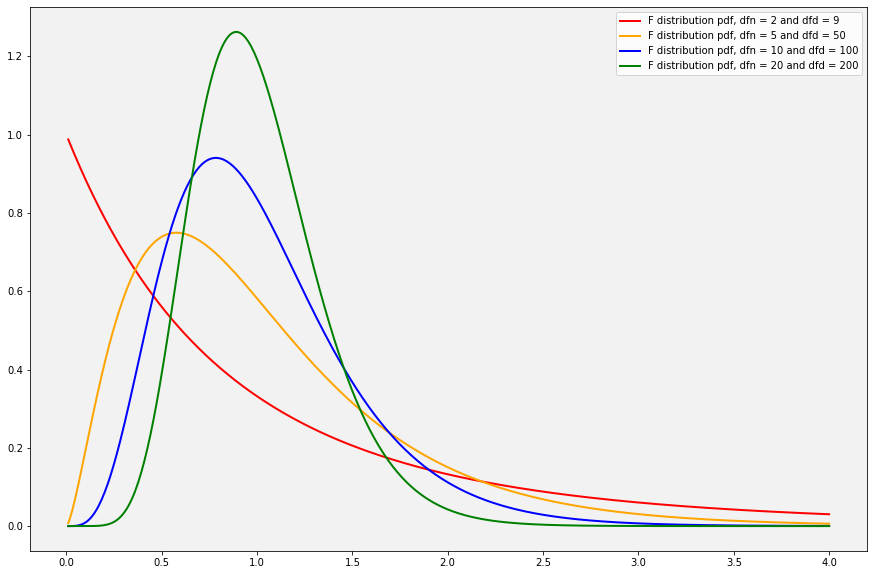

In [54]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('0.95')  # set background color to light grey

x = np.linspace(0.01, 4, 500)

# dfn: degrees of freedom of the numerator (between groups)
# dfd: degrees of freedom of the denominator (within groups)

dfn, dfd = 2, 9
ax.plot(x, st.f.pdf(x, dfn, dfd), 'red', lw=2, label='F distribution pdf, dfn = {} and dfd = {}'.format(dfn, dfd))

dfn, dfd = 5, 50
ax.plot(x, st.f.pdf(x, dfn, dfd), 'orange', lw=2, label='F distribution pdf, dfn = {} and dfd = {}'.format(dfn, dfd))

dfn, dfd = 10, 100
ax.plot(x, st.f.pdf(x, dfn, dfd), 'blue', lw=2, label='F distribution pdf, dfn = {} and dfd = {}'.format(dfn, dfd))

dfn, dfd = 20, 200
ax.plot(x, st.f.pdf(x, dfn, dfd), 'green', lw=2, label='F distribution pdf, dfn = {} and dfd = {}'.format(dfn, dfd))

plt.legend()
plt.show()

In [61]:
s = np.array([15, 12, 14, 11])
i = np.array([39, 45, 48, 60])
k = np.array([65, 45, 32, 38])

n = np.array([[len(s)], [len(i)], [len(k)]])

m = np.array([[s.mean()], [i.mean()], [k.mean()]])

m_G = m.mean()

print(m)
print(m_G)

[[13.]
 [48.]
 [45.]]
35.333333333333336


In [62]:
SS_between = np.dot(n.T, (m - m_G)**2)

print(SS_between)

[[3010.66666667]]


In [63]:
data = np.array([s, i, k])
SS_within = np.sum((data - m)**2)

print(SS_within)

862.0


In [64]:
K = 3
df_between = K - 1
df_within = n.sum() - K

print(df_between, df_within)

2 9


In [65]:
ms_between = SS_between / df_between
ms_within = SS_within / df_within

print(ms_between, ms_within)

[[1505.33333333]] 95.77777777777777


In [70]:
F = ms_between / ms_within

print("F statistic = {:.4f}".format(F[0, 0]))

F statistic = 15.7169


In [71]:
confidence = .95
f_critical = st.f.ppf(confidence, df_between, df_within)

print("The F critical value for confidence = {:.2f} is: {:.3f}".format(confidence, f_critical))

The F critical value for confidence = 0.95 is: 4.256


In [79]:
pvalue = 1 - st.f.cdf(F, df_between, df_within)

print("The p value is: {:.4f}".format(pvalue[0, 0]))
print("Thus we reject the null hypothesis that the 3 means are equal")

The p value is: 0.0012
Thus we reject the null hypothesis that the 3 means are equal


### Alternative calculation using `scipy.stats.f_oneway()`

In [80]:
print(st.f_oneway(s, i, k))

F_onewayResult(statistic=15.716937354988401, pvalue=0.0011580762838382535)


# Problem Set 12

### Problem 1

In [196]:
s = np.array([8, 7, 10, 6, 9])
i = np.array([4, 6, 7, 4, 9])
k = np.array([4, 4, 7, 2, 3])

n = np.array([[len(s)], [len(i)], [len(k)]])

m = np.array([[s.mean()], [i.mean()], [k.mean()]])

m_G = m.mean()

print(m)
print(m_G)

[[8.]
 [6.]
 [4.]]
6.0


In [197]:
SS_between = np.dot(n.T, (m - m_G)**2)

print(SS_between)

[[40.]]


In [198]:
data = np.array([s, i, k])
SS_within = np.sum((data - m)**2)

print(SS_within)

42.0


In [199]:
K = 3
df_between = K - 1
df_within = n.sum() - K

print(df_between, df_within)

2 12


In [200]:
ms_between = SS_between / df_between
ms_within = SS_within / df_within

print(ms_between, ms_within)

[[20.]] 3.5


In [201]:
F = ms_between / ms_within

print("F statistic = {:.4f}".format(F[0, 0]))

F statistic = 5.7143


In [202]:
confidence = .95
f_critical = st.f.ppf(confidence, df_between, df_within)

print("The F critical value for confidence = {:.2f} is: {:.3f}".format(confidence, f_critical))

The F critical value for confidence = 0.95 is: 3.885


In [203]:
pvalue = 1 - st.f.cdf(F, df_between, df_within)

print("The p value is: {:.4f}".format(pvalue[0, 0]))
print("Thus we reject the null hypothesis that the 3 means are equal")

The p value is: 0.0181
Thus we reject the null hypothesis that the 3 means are equal


In [204]:
n2 = SS_between / (SS_between + SS_within)
print(n2)

[[0.48780488]]


In [205]:
q = qsturng(.95, K, df_within)
print("Studentized range statistic = {:.3f}".format(q))

Studentized range statistic = 3.771


In [206]:
HSD = q * np.sqrt(ms_within / n[0, 0])

print("Tukey's HSD = {:.3f}".format(HSD))

Tukey's HSD = 3.155


# Lesson 14

## Problem 1

In [93]:
s = np.array([2, 3, 4])
i = np.array([5, 6, 7])
k = np.array([8, 9, 10])

n = np.array([[len(s)], [len(i)], [len(k)]])

m = np.array([[s.mean()], [i.mean()], [k.mean()]])

m_G = m.mean()

print(m)
print(m_G)

[[3.]
 [6.]
 [9.]]
6.0


In [94]:
SS_between = np.dot(n.T, (m - m_G)**2)

print(SS_between)

[[54.]]


In [95]:
data = np.array([s, i, k])
SS_within = np.sum((data - m)**2)

print(SS_within)

6.0


In [96]:
K = 3
df_between = K - 1
df_within = n.sum() - K

print(df_between, df_within)

2 6


In [97]:
ms_between = SS_between / df_between
ms_within = SS_within / df_within

print(ms_between, ms_within)

[[27.]] 1.0


In [98]:
F = ms_between / ms_within

print("F statistic = {:.4f}".format(F[0, 0]))

F statistic = 27.0000


In [99]:
confidence = .95
f_critical = st.f.ppf(confidence, df_between, df_within)

print("The F critical value for confidence = {:.2f} is: {:.3f}".format(confidence, f_critical))

The F critical value for confidence = 0.95 is: 5.143


## Tukey's HSD

In [137]:
q = qsturng(.95, K, df_within)
print("Studentized range statistic = {:.3f}".format(q))

Studentized range statistic = 4.334


In [138]:
HSD = q * np.sqrt(ms_within / n[0, 0])

print("Tukey's HSD = {:.3f}".format(HSD))

Tukey's HSD = 2.502


In [139]:
result = MultiComparison(data.flatten(), np.array(['i']*3 + ['j']*3 + ['k']*3)).tukeyhsd(alpha=0.05)

print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     i      j      3.0 0.0241 0.4977 5.5023   True
     i      k      6.0  0.001 3.4977 8.5023   True
     j      k      3.0 0.0241 0.4977 5.5023   True
--------------------------------------------------


In [140]:
confidence = .95
f_critical = st.f.ppf(confidence, 3, 184)

print("The F critical value for confidence = {:.2f} is: {:.3f}".format(confidence, f_critical))

The F critical value for confidence = 0.95 is: 2.654


In [141]:
confidence = .99
f_critical = st.f.ppf(confidence, 3, 184)

print("The F critical value for confidence = {:.2f} is: {:.3f}".format(confidence, f_critical))

The F critical value for confidence = 0.99 is: 3.890


In [ ]:
pairwise_tukeyhsd

## Problem 2

In [149]:
placebo = np.array([1.5, 1.3, 1.8, 1.3, 1.6])
drug1 = np.array([1.2, 1.6, 1.7, 1.9])
drug2 = np.array([2.0, 1.4, 1.5, 1.5, 1.8, 1.7, 1.4])
drug3 = np.array([2.9, 3.1, 2.8, 2.7])

n = np.array([[len(placebo)], [len(drug1)], [len(drug2)], [len(drug3)]])

m = np.array([[placebo.mean()], [drug1.mean()], [drug2.mean()], [drug3.mean()]])

m_G = (placebo.sum() + drug1.sum() + drug2.sum() + drug3.sum()) / n.sum()

print(m)
print(m_G)

[[1.5       ]
 [1.6       ]
 [1.61428571]
 [2.875     ]]
1.8350000000000002


In [151]:
SS_between = np.dot(n.T, (m - m_G)**2)[0, 0]

print(SS_between)

5.449428571428571


In [154]:
s1 = ((placebo - m[0, 0])**2).sum()
s2 = ((drug1 - m[1, 0])**2).sum()
s3 = ((drug2 - m[2, 0])**2).sum()
s4 = ((drug3 - m[3, 0])**2).sum()

SS_within = np.sum([s1, s2, s3, s4])

print(SS_within)

0.8360714285714287


In [155]:
K = 4
df_between = K - 1
df_within = n.sum() - K

print(df_between, df_within)

3 16


In [156]:
ms_between = SS_between / df_between
ms_within = SS_within / df_within

print(ms_between, ms_within)

1.8164761904761904 0.05225446428571429


In [158]:
F = ms_between / ms_within

print("F statistic = {:.4f}".format(F))

F statistic = 34.7621


In [159]:
n2 = SS_between / (SS_between + SS_within)
print(n2)

0.8669841017307408


In [164]:
pvalue = 1 - st.f.cdf(F, df_between, df_within)

print("The p value is: {:.10f}".format(pvalue))
print("Thus we reject the null hypothesis that all means are equal")

The p value is: 0.0000003072
Thus we reject the null hypothesis that all means are equal


### Alternative calculation using `scipy.stats.f_oneway()`

In [160]:
print(st.f_oneway(placebo, drug1, drug2, drug3))

F_onewayResult(statistic=34.76212444824149, pvalue=3.072132691573616e-07)


# Problem Set 15

In [165]:
st.f.ppf(.95, 2, 30)

3.3158295010135217

In [166]:
st.f.ppf(.95, 3, 15)

3.2873821046365115

In [167]:
st.f.ppf(.95, 1, 30)

4.170876785766691

In [168]:
st.f.ppf(.95, 2, 50)

3.1826098520427744

In [169]:
n = np.array([[6], [5], [7]])

m = np.array([[-10], [12], [0.2]])

m_G = 1.4/18

print(m)
print(m_G)

[[-10. ]
 [ 12. ]
 [  0.2]]
0.07777777777777778


In [170]:
SS_between = np.dot(n.T, (m - m_G)**2)

print(SS_between)

[[1320.17111111]]


In [171]:
K = 3
df_between = K - 1
df_within = n.sum() - K

print(df_between, df_within)

2 15


In [181]:
SS_within = 80 + 50 + 3.48

In [182]:
ms_between = SS_between[0, 0] / df_between
ms_within = SS_within / df_within

print(ms_between, ms_within)

660.0855555555555 8.898666666666665


In [183]:
F = ms_between / ms_within

print("F statistic = {:.4f}".format(F))

F statistic = 74.1780


In [184]:
confidence = .95
f_critical = st.f.ppf(confidence, df_between, df_within)

print("The F critical value for confidence = {:.2f} is: {:.3f}".format(confidence, f_critical))

The F critical value for confidence = 0.95 is: 3.682


In [185]:
n2 = SS_between / (SS_between + SS_within)
print(n2)

[[0.90817604]]
